In [113]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from typing import Callable
from cmath import phase as arg, cos, sin, pi, sqrt, e, isclose, atan

In [114]:
def p_cross(cat, swan):
    if swan == 0 or cat == 0:
        return 0
    tmp = swan.real * cat.imag - swan.imag * cat.real
    if tmp == 0:
        return 1
    else:
        return tmp / abs(tmp)

def test_strategy(cat_start: complex, swan_start: complex, tick_limit: int, dt: float, v_cat: Callable, v_swan: Callable, points_out: list) -> int:
    cat = cat_start
    swan = swan_start

    for _ in range(tick_limit):
        swan += v_swan(cat, swan) * dt
        cat += v_cat(cat, swan) * dt

        # Correct for integration errors by normalizing
        cat /= abs(cat)

        points_out.append((swan, cat))
        if abs(cat - swan) < 10 * dt:
            print("The swan was caught")
            return -1
        elif abs(swan) >= 1.:
            print("The swan flew away")
            return 0
    return 0

In [120]:
swan = 0
cat = 1

def v_cat(cat, swan):
    t = p_cross(cat, swan)
    # Directed outside of the circle
    v = cos(arg(cat)) + 1j * sin(arg(cat))
    if t <= 0:
        v *= 1j
    else:
        v *= -1j
    return 4 * v

def v_swan_go_away(cat, _swan):
    return -cat

def v_swan_dash(cat, swan):
    return 1j

qqq = None

def v_swan_smart(cat, swan):
    omega_tick = arg(v_cat(cat, swan))
    v_a = sqrt(1 - (omega_tick * abs(swan)) ** 2)

    # This should be close to 1
    v =  cat * (1j * v_a - omega_tick * abs(swan))
    return v

0


''

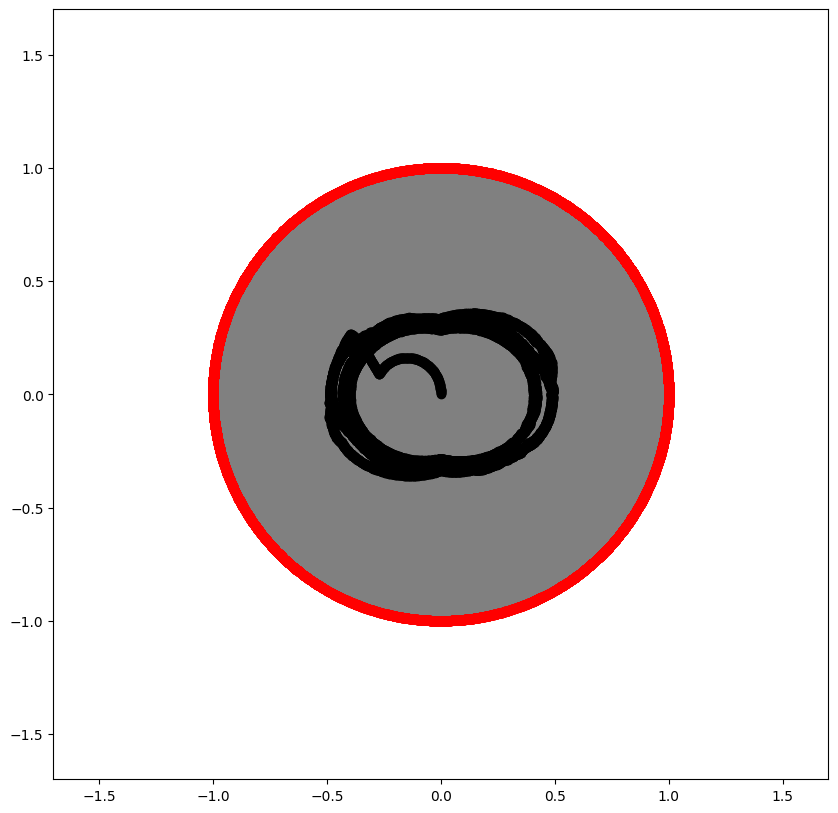

In [121]:

points = []
dt = 0.0025

result = test_strategy(cat, swan, 10000, dt, v_cat, v_swan_smart, points)
print(result)

circle = plt.Circle((0, 0), 1, color='gray')
fig, ax = plt.subplots(figsize=(10, 10))
for (swan, cat) in points:
    plt.plot(swan.real, swan.imag, 'o', color='black')
    plt.plot(cat.real, cat.imag, 'o', color='red')

ax.add_patch(circle)
ax.set_xlim([-1.7, 1.7])
ax.set_ylim([-1.7, 1.7])

;